In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score,confusion_matrix,classification_report,plot_confusion_matrix,cohen_kappa_score
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('Loan_Details_transactions.csv')
data2 = pd.read_csv('Loan_status_mapping.csv')
data3=pd.read_excel('City_Master.xlsx')
data4=pd.read_csv('Branch_ID_Master.csv')
data5=pd.read_excel('State_Master.xlsx')
data6=pd.read_excel('Region_Master.xlsx')
data7=pd.read_excel('Postal_Code_Master.xlsx')
data8=pd.read_excel('State_Region_Mapping.xlsx')

In [3]:
output1 = pd.merge(data1, data2,on='Loan_Id',how='inner')
output1.head()

Loan_Id  Disbursed_Amount  Asset_Cost    ltv  Branch_Id City_Code  \
0        1             36439       65850  56.19         64      CT01   
1        2             48749       69303  72.15         67      CT03   
2        3             55348       66340  85.00          2      CT13   
3        4             48849       64133  77.96        217      CT06   
4        5             40394       59386  70.72         74      CT03   

  State_Code  Postal_Code Date_of_Birth Employment_Type  ... Aadhar_flag  \
0       ST15       400001    14-06-1990   Self employed  ...           1   
1       ST24       600020    01-01-1991        Salaried  ...           1   
2       ST04       801110    16-08-1993   Self employed  ...           1   
3       ST22       302029    01-01-1989   Self employed  ...           1   
4       ST24       600020    31-12-1974   Self employed  ...           1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0             0              0                  0   
1         0             0             0              0                783   
2         0             0             0              0                  0   
3         0             0             0              0                  0   
4         0             0             0              0                 14   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  CREDIT.HISTORY.LENGTH  \
0                                    0              0yrs 0mon   
1                                    0              2yrs 6mon   
2                                    0              0yrs 0mon   
3                                    0              0yrs 0mon   
4                                    1              3yrs 1mon   

   NO.OF_INQUIRIES Loan_Default  
0                0            0  
1                0            0  
2                0            1  
3                0            0  
4                1            0  

[5 rows x 22 columns]

In [4]:
output2 = pd.merge(data3, data7,on='City_Code',how='inner')
output2.head()

City_Code State_Code City_Name_x City_Name_y  Postal_Code
0      CT01       ST15      Mumbai      Mumbai       400001
1      CT01       ST15      Mumbai      Mumbai       400053
2      CT01       ST15      Mumbai      Mumbai       422001
3      CT02       ST15        Pune        Pune       411002
4      CT02       ST15        Pune        Pune       411006

In [5]:
output3 = pd.merge(output2, data5, on='State_Code', how='inner')
output3.head()

City_Code State_Code City_Name_x City_Name_y  Postal_Code   State_Name
0      CT01       ST15      Mumbai      Mumbai       400001  Maharashtra
1      CT01       ST15      Mumbai      Mumbai       400053  Maharashtra
2      CT01       ST15      Mumbai      Mumbai       422001  Maharashtra
3      CT02       ST15        Pune        Pune       411002  Maharashtra
4      CT02       ST15        Pune        Pune       411006  Maharashtra

In [6]:
output4 = pd.merge(output3, data8, on='State_Code',how='inner')
output4.head()

City_Code State_Code City_Name_x City_Name_y  Postal_Code   State_Name  \
0      CT01       ST15      Mumbai      Mumbai       400001  Maharashtra   
1      CT01       ST15      Mumbai      Mumbai       400053  Maharashtra   
2      CT01       ST15      Mumbai      Mumbai       422001  Maharashtra   
3      CT02       ST15        Pune        Pune       411002  Maharashtra   
4      CT02       ST15        Pune        Pune       411006  Maharashtra   

  Region   State Name Region_ID  
0   West  Maharashtra        R4  
1   West  Maharashtra        R4  
2   West  Maharashtra        R4  
3   West  Maharashtra        R4  
4   West  Maharashtra        R4

In [7]:
output5 = pd.merge(data6, output4,on='Region_ID', how='inner')
output5.head()

Region_ID Region_Name City_Code State_Code City_Name_x City_Name_y  \
0        R1       North      CT06       ST22      Jaipur      Jaipur   
1        R1       North      CT06       ST22      Jaipur      Jaipur   
2        R1       North      CT09       ST34       Delhi       Delhi   
3        R1       North      CT18       ST21    Ludhiana    Ludhiana   
4        R2       South      CT03       ST24     Chennai     Chennai   

   Postal_Code  State_Name Region  State Name  
0       302029   Rajasthan  North   Rajasthan  
1       302013   Rajasthan  North   Rajasthan  
2       110039       Delhi  North       Delhi  
3       141003      Punjab  North      Punjab  
4       600020  Tamil Nadu  South  Tamil Nadu

In [8]:
df = pd.merge(output1, output5,on='City_Code', how='inner')
df.head()

Loan_Id  Disbursed_Amount  Asset_Cost    ltv  Branch_Id City_Code  \
0        1             36439       65850  56.19         64      CT01   
1        1             36439       65850  56.19         64      CT01   
2        1             36439       65850  56.19         64      CT01   
3       10             34639       69717  50.49         34      CT01   
4       10             34639       69717  50.49         34      CT01   

  State_Code_x  Postal_Code_x Date_of_Birth Employment_Type  ... Loan_Default  \
0         ST15         400001    14-06-1990   Self employed  ...            0   
1         ST15         400001    14-06-1990   Self employed  ...            0   
2         ST15         400001    14-06-1990   Self employed  ...            0   
3         ST15         400001    23-11-1982   Self employed  ...            1   
4         ST15         400001    23-11-1982   Self employed  ...            1   

   Region_ID  Region_Name  State_Code_y  City_Name_x  City_Name_y  \
0         R4         West          ST15       Mumbai       Mumbai   
1         R4         West          ST15       Mumbai       Mumbai   
2         R4         West          ST15       Mumbai       Mumbai   
3         R4         West          ST15       Mumbai       Mumbai   
4         R4         West          ST15       Mumbai       Mumbai   

   Postal_Code_y   State_Name  Region   State Name  
0         400001  Maharashtra    West  Maharashtra  
1         400053  Maharashtra    West  Maharashtra  
2         422001  Maharashtra    West  Maharashtra  
3         400001  Maharashtra    West  Maharashtra  
4         400053  Maharashtra    West  Maharashtra  

[5 rows x 31 columns]

In [9]:
df.columns

Index(['Loan_Id', 'Disbursed_Amount', 'Asset_Cost', 'ltv', 'Branch_Id',
       'City_Code', 'State_Code_x', 'Postal_Code_x', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Loan_Default', 'Region_ID',
       'Region_Name', 'State_Code_y', 'City_Name_x', 'City_Name_y',
       'Postal_Code_y', 'State_Name', 'Region', 'State Name'],
      dtype='object')

In [10]:
df.drop(['State_Name','Postal_Code_x','State_Code_x','City_Name_y','Region_Name'],inplace=True,axis=1)

In [11]:
df['Self employed'] = pd.get_dummies(df['Employment_Type'],drop_first=True)

In [12]:
df.head()

Loan_Id  Disbursed_Amount  Asset_Cost    ltv  Branch_Id City_Code  \
0        1             36439       65850  56.19         64      CT01   
1        1             36439       65850  56.19         64      CT01   
2        1             36439       65850  56.19         64      CT01   
3       10             34639       69717  50.49         34      CT01   
4       10             34639       69717  50.49         34      CT01   

  Date_of_Birth Employment_Type DisbursalDate  MobileNo_Avl_Flag  ...  \
0    14-06-1990   Self employed    28-09-2018                  1  ...   
1    14-06-1990   Self employed    28-09-2018                  1  ...   
2    14-06-1990   Self employed    28-09-2018                  1  ...   
3    23-11-1982   Self employed    26-10-2018                  1  ...   
4    23-11-1982   Self employed    26-10-2018                  1  ...   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  Loan_Default  Region_ID  \
0              0yrs 0mon                0             0         R4   
1              0yrs 0mon                0             0         R4   
2              0yrs 0mon                0             0         R4   
3             3yrs 10mon                0             1         R4   
4             3yrs 10mon                0             1         R4   

   State_Code_y  City_Name_x  Postal_Code_y Region   State Name  Self employed  
0          ST15       Mumbai         400001   West  Maharashtra              1  
1          ST15       Mumbai         400053   West  Maharashtra              1  
2          ST15       Mumbai         422001   West  Maharashtra              1  
3          ST15       Mumbai         400001   West  Maharashtra              1  
4          ST15       Mumbai         400053   West  Maharashtra              1  

[5 rows x 27 columns]

In [13]:
import missingno as ms

<AxesSubplot:>

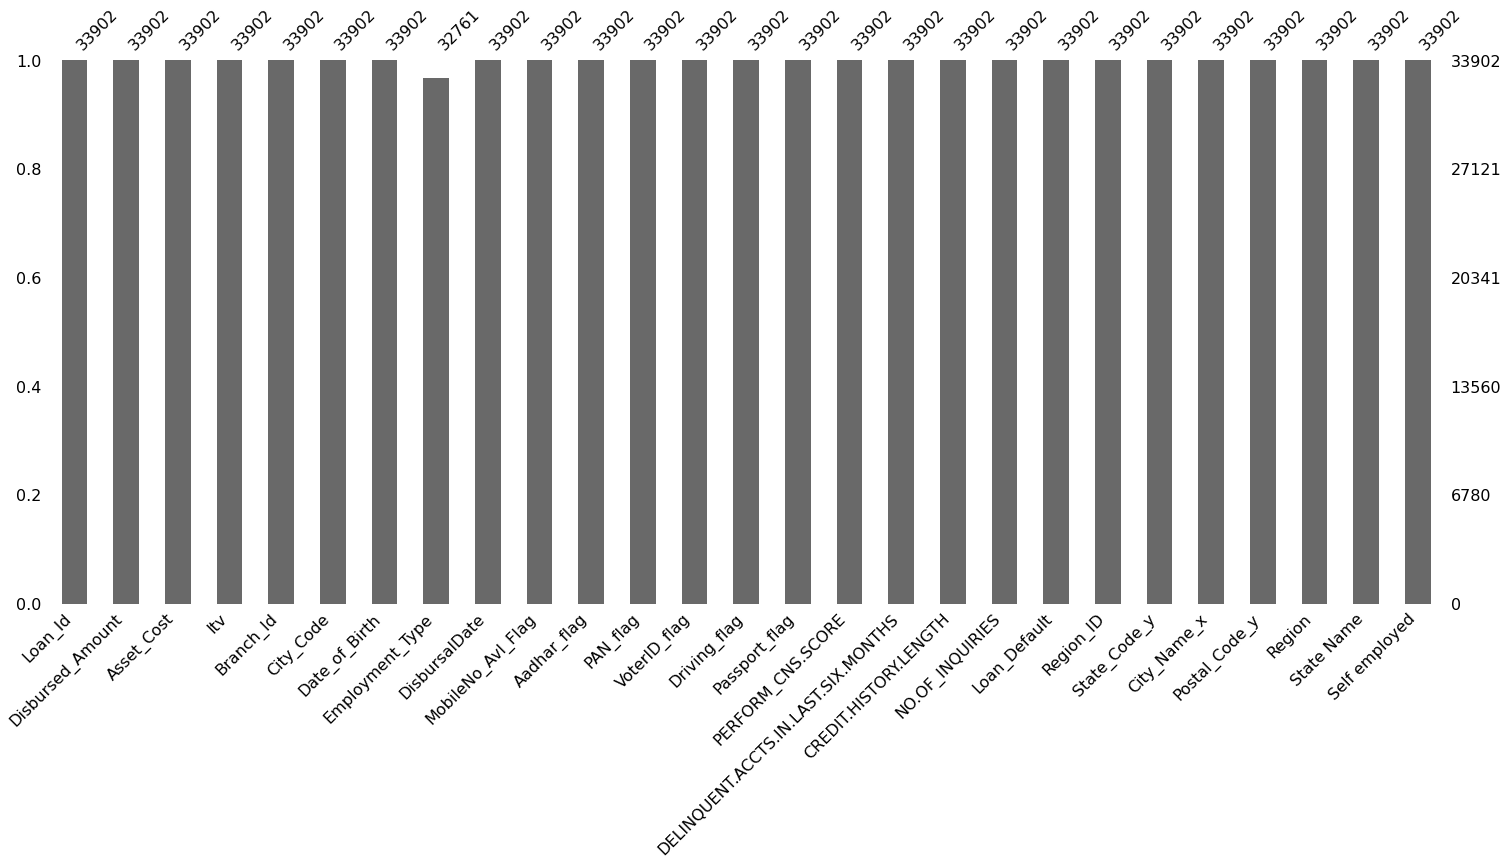

In [14]:
ms.bar(df)

<AxesSubplot:>

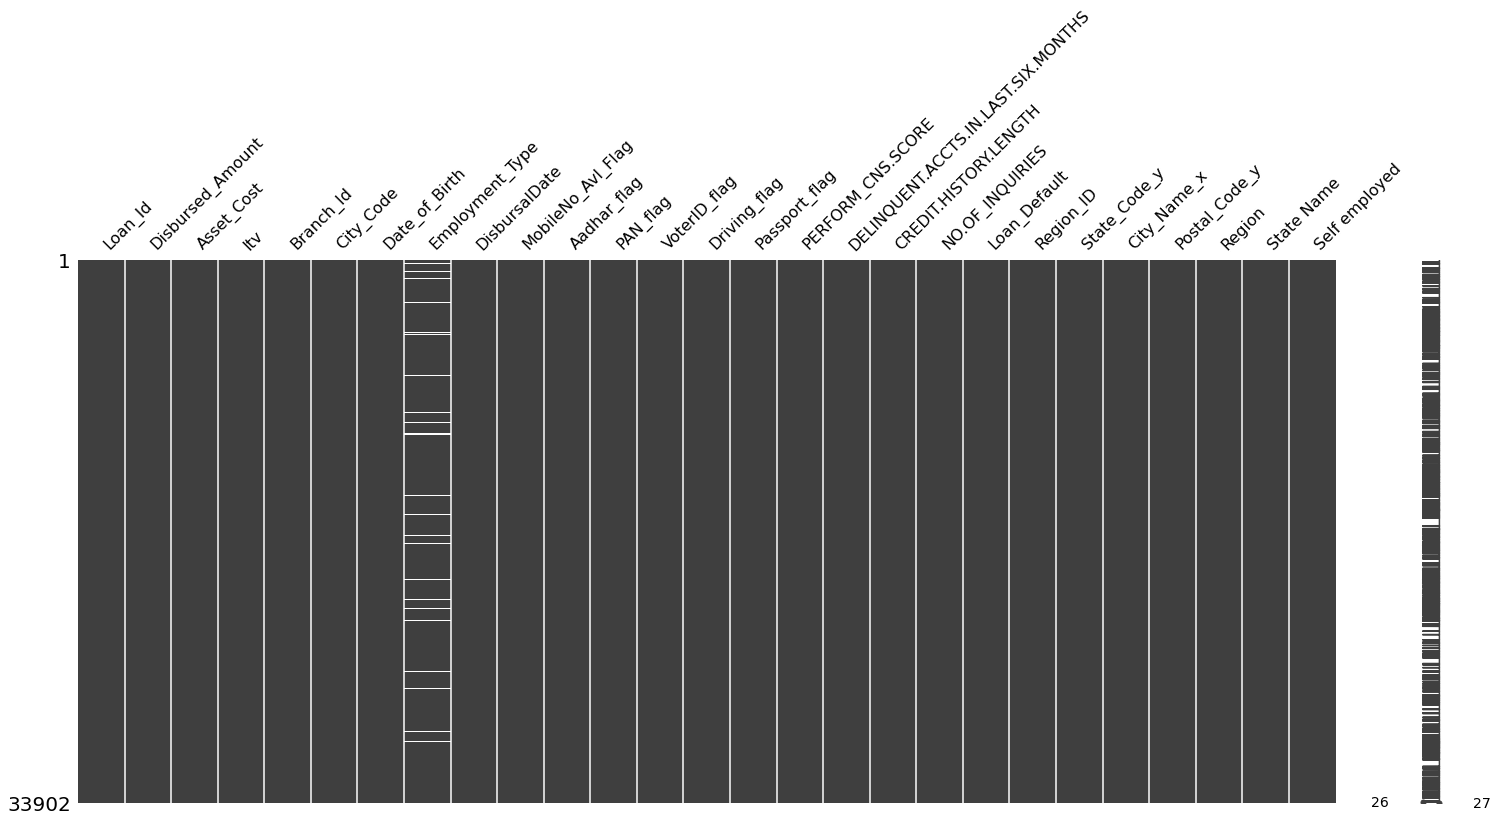

In [15]:
ms.matrix(df)

In [16]:
df.isnull().sum()

Loan_Id                                   0
Disbursed_Amount                          0
Asset_Cost                                0
ltv                                       0
Branch_Id                                 0
City_Code                                 0
Date_of_Birth                             0
Employment_Type                        1141
DisbursalDate                             0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0
CREDIT.HISTORY.LENGTH                     0
NO.OF_INQUIRIES                           0
Loan_Default                              0
Region_ID                                 0
State_Code_y                              0
City_Name_x                     

In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates()

Loan_Id  Disbursed_Amount  Asset_Cost    ltv  Branch_Id City_Code  \
0            1             36439       65850  56.19         64      CT01   
1            1             36439       65850  56.19         64      CT01   
2            1             36439       65850  56.19         64      CT01   
3           10             34639       69717  50.49         34      CT01   
4           10             34639       69717  50.49         34      CT01   
...        ...               ...         ...    ...        ...       ...   
33897    23130             59913       69678  87.55          5      CT05   
33898    23250             49078       68780  74.15        251      CT05   
33899    23250             49078       68780  74.15        251      CT05   
33900    23254             56174       76264  76.71          3      CT05   
33901    23254             56174       76264  76.71          3      CT05   

      Date_of_Birth Employment_Type DisbursalDate  MobileNo_Avl_Flag  ...  \
0        14-06-1990   Self employed    28-09-2018                  1  ...   
1        14-06-1990   Self employed    28-09-2018                  1  ...   
2        14-06-1990   Self employed    28-09-2018                  1  ...   
3        23-11-1982   Self employed    26-10-2018                  1  ...   
4        23-11-1982   Self employed    26-10-2018                  1  ...   
...             ...             ...           ...                ...  ...   
33897    16-04-1994        Salaried    20-09-2018                  1  ...   
33898    11-01-1970   Self employed    09-08-2018                  1  ...   
33899    11-01-1970   Self employed    09-08-2018                  1  ...   
33900    01-12-1969        Salaried    13-10-2018                  1  ...   
33901    01-12-1969        Salaried    13-10-2018                  1  ...   

       CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  Loan_Default  Region_ID  \
0                  0yrs 0mon                0             0         R4   
1                  0yrs 0mon                0             0         R4   
2                  0yrs 0mon                0             0         R4   
3                 3yrs 10mon                0             1         R4   
4                 3yrs 10mon                0             1         R4   
...                      ...              ...           ...        ...   
33897              0yrs 0mon                0             0         R2   
33898              0yrs 0mon                0             1         R2   
33899              0yrs 0mon                0             1         R2   
33900             4yrs 10mon                0             0         R2   
33901             4yrs 10mon                0             0         R2   

       State_Code_y  City_Name_x  Postal_Code_y Region   State Name  \
0              ST15       Mumbai         400001   West  Maharashtra   
1              ST15       Mumbai         400053   West  Maharashtra   
2              ST15       Mumbai         422001   West  Maharashtra   
3              ST15       Mumbai         400001   West  Maharashtra   
4              ST15       Mumbai         400053   West  Maharashtra   
...             ...          ...            ...    ...          ...   
33897          ST25    Hyderabad         500045  South    Telangana   
33898          ST25    Hyderabad         500004  South    Telangana   
33899          ST25    Hyderabad         500045  South    Telangana   
33900          ST25    Hyderabad         500004  South    Telangana   
33901          ST25    Hyderabad         500045  South    Telangana   

       Self employed  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
33897              0  
33898              1  
33899              1  
33900              0  
33901              0  

[33902 rows x 27 columns]

In [19]:
df['Employment_Type'].value_counts()

Self employed    18376
Salaried         14385
Name: Employment_Type, dtype: int64

In [20]:
df['Employment_Type'].fillna('Unemployed', inplace = True)

In [21]:
df.isnull().sum()

Loan_Id                                0
Disbursed_Amount                       0
Asset_Cost                             0
ltv                                    0
Branch_Id                              0
City_Code                              0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
Loan_Default                           0
Region_ID                              0
State_Code_y                           0
City_Name_x                            0
Postal_Code_y                          0
Region          

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(33902, 27)

In [24]:
df.head()

Loan_Id  Disbursed_Amount  Asset_Cost    ltv  Branch_Id City_Code  \
0        1             36439       65850  56.19         64      CT01   
1        1             36439       65850  56.19         64      CT01   
2        1             36439       65850  56.19         64      CT01   
3       10             34639       69717  50.49         34      CT01   
4       10             34639       69717  50.49         34      CT01   

  Date_of_Birth Employment_Type DisbursalDate  MobileNo_Avl_Flag  ...  \
0    14-06-1990   Self employed    28-09-2018                  1  ...   
1    14-06-1990   Self employed    28-09-2018                  1  ...   
2    14-06-1990   Self employed    28-09-2018                  1  ...   
3    23-11-1982   Self employed    26-10-2018                  1  ...   
4    23-11-1982   Self employed    26-10-2018                  1  ...   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  Loan_Default  Region_ID  \
0              0yrs 0mon                0             0         R4   
1              0yrs 0mon                0             0         R4   
2              0yrs 0mon                0             0         R4   
3             3yrs 10mon                0             1         R4   
4             3yrs 10mon                0             1         R4   

   State_Code_y  City_Name_x  Postal_Code_y Region   State Name  Self employed  
0          ST15       Mumbai         400001   West  Maharashtra              1  
1          ST15       Mumbai         400053   West  Maharashtra              1  
2          ST15       Mumbai         422001   West  Maharashtra              1  
3          ST15       Mumbai         400001   West  Maharashtra              1  
4          ST15       Mumbai         400053   West  Maharashtra              1  

[5 rows x 27 columns]

In [25]:
df.to_csv('l&t_loan_default.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33902 entries, 0 to 33901
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Id                              33902 non-null  int64  
 1   Disbursed_Amount                     33902 non-null  int64  
 2   Asset_Cost                           33902 non-null  int64  
 3   ltv                                  33902 non-null  float64
 4   Branch_Id                            33902 non-null  int64  
 5   City_Code                            33902 non-null  object 
 6   Date_of_Birth                        33902 non-null  object 
 7   Employment_Type                      33902 non-null  object 
 8   DisbursalDate                        33902 non-null  object 
 9   MobileNo_Avl_Flag                    33902 non-null  int64  
 10  Aadhar_flag                          33902 non-null  int64  
 11  PAN_flag                    

In [27]:
df.describe()

Loan_Id  Disbursed_Amount     Asset_Cost           ltv  \
count  33902.000000      33902.000000   33902.000000  33902.000000   
mean   11640.221786      54207.540971   75740.440416     74.678320   
std     6754.761740      12912.628712   18783.082337     11.537117   
min        1.000000      13600.000000   37230.000000     17.130000   
25%     5792.000000      46949.000000   65599.250000     68.810000   
50%    11594.500000      53678.000000   70854.000000     76.750000   
75%    17559.000000      60245.500000   79192.000000     83.670000   
max    23315.000000     592460.000000  715186.000000     94.980000   

          Branch_Id  MobileNo_Avl_Flag   Aadhar_flag      PAN_flag  \
count  33902.000000            33902.0  33902.000000  33902.000000   
mean      72.115922                1.0      0.848151      0.072503   
std       69.093252                0.0      0.358880      0.259323   
min        1.000000                1.0      0.000000      0.000000   
25%       13.000000                1.0      1.000000      0.000000   
50%       61.000000                1.0      1.000000      0.000000   
75%      130.000000                1.0      1.000000      0.000000   
max      261.000000                1.0      1.000000      1.000000   

       VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
count  33902.000000  33902.000000   33902.000000       33902.000000   
mean       0.138399      0.023420       0.002035         294.760516   
std        0.345323      0.151237       0.045069         339.628968   
min        0.000000      0.000000       0.000000           0.000000   
25%        0.000000      0.000000       0.000000           0.000000   
50%        0.000000      0.000000       0.000000          14.000000   
75%        0.000000      0.000000       0.000000         680.000000   
max        1.000000      1.000000       1.000000         879.000000   

       DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  NO.OF_INQUIRIES  Loan_Default  \
count                         33902.000000     33902.000000  33902.000000   
mean                              0.099050         0.210814      0.218748   
std                               0.387384         0.712340      0.413403   
min                               0.000000         0.000000      0.000000   
25%                               0.000000         0.000000      0.000000   
50%                               0.000000         0.000000      0.000000   
75%                               0.000000         0.000000      0.000000   
max                               7.000000        23.000000      1.000000   

       Postal_Code_y  Self employed  
count   33902.000000   33902.000000  
mean   544488.096720       0.542033  
std    175517.046957       0.498237  
min    110039.000000       0.000000  
25%    400053.000000       0.000000  
50%    560034.000000       1.000000  
75%    680503.000000       1.000000  
max    835204.000000       1.000000

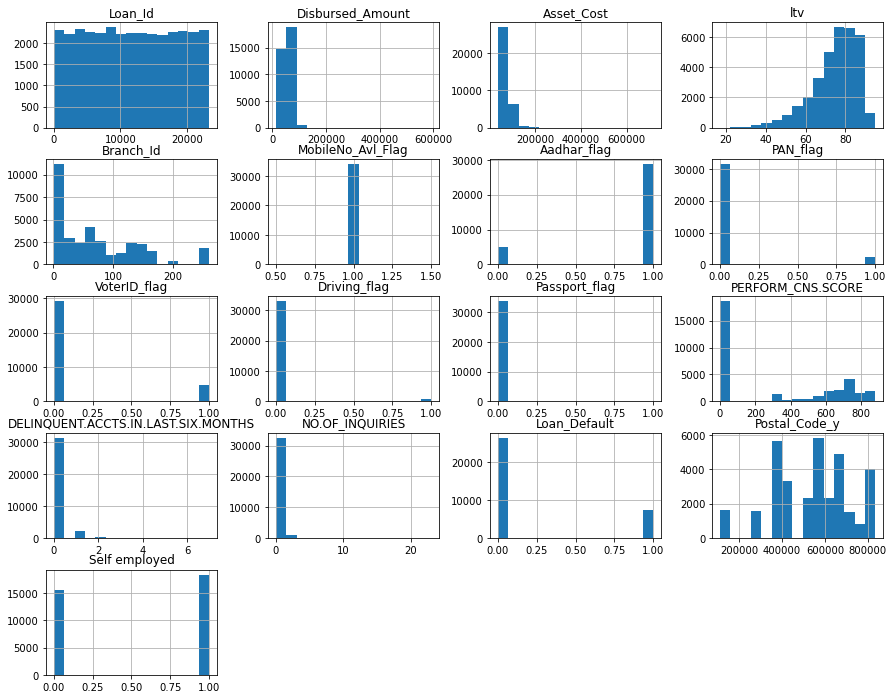

In [28]:
df.hist(figsize=(15,12),bins = 15)
plt.show()

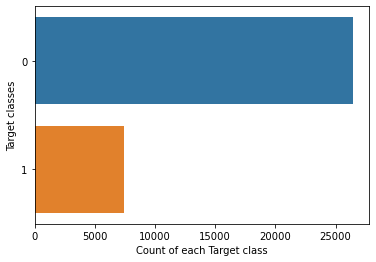

In [29]:
sns.countplot(y="Loan_Default" ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [30]:
pct_loan_default = df['Loan_Default'].value_counts(normalize=True)*100
pct_loan_default

0    78.125184
1    21.874816
Name: Loan_Default, dtype: float64

In [31]:
import plotly.express as px 
fig = px.pie(values=pct_loan_default.values, names=['Not defaulted','Defaulted']) 
fig.show()

78.3% observations in the dataset have no defaulted loan while 21.7% have defaulted loan. It is slighly imbalanced dataset.

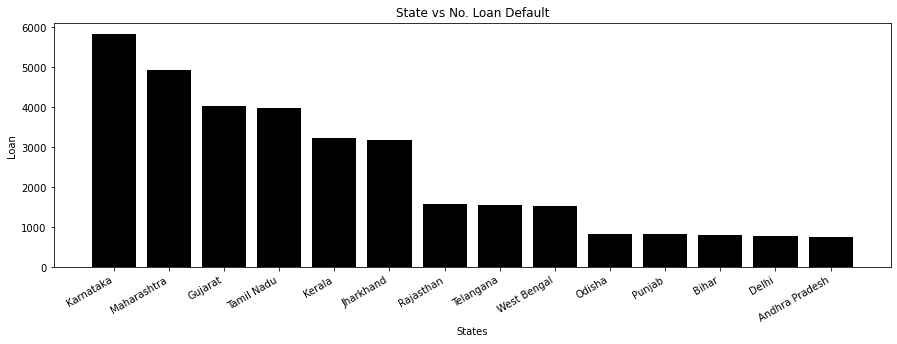

In [32]:
sub_data1 = df.loc[:, ['State Name']]
stadium = sub_data1['State Name'].value_counts().head(15).keys().tolist()
values = sub_data1['State Name'].value_counts().head(15).tolist()
plt.gcf().set_size_inches(15,5)
plt.xlabel('States')
plt.ylabel('Loan')
plt.title('State vs No. Loan Default')
plt.bar( stadium,values, color = 'black')
plt.gcf().autofmt_xdate()
plt.show()

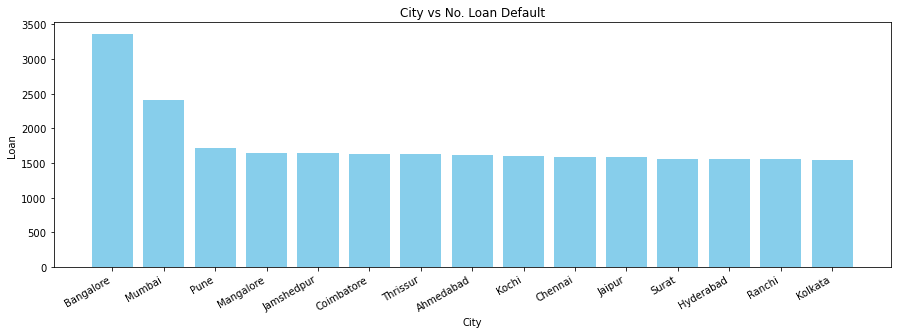

In [33]:
sub_data1 = df.loc[:, ['City_Name_x']]
stadium = sub_data1['City_Name_x'].value_counts().head(15).keys().tolist()
values = sub_data1['City_Name_x'].value_counts().head(15).tolist()
plt.gcf().set_size_inches(15,5)
plt.xlabel('City')
plt.ylabel('Loan')
plt.title('City vs No. Loan Default')
plt.bar( stadium,values, color = 'skyblue')
plt.gcf().autofmt_xdate()
plt.show()

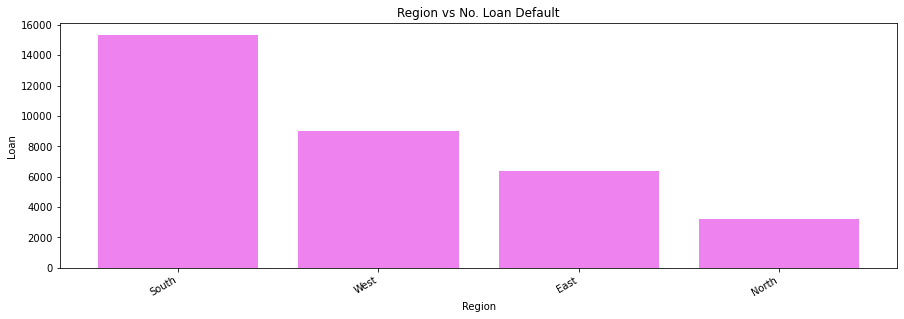

In [34]:
sub_data1 = df.loc[:, ['Region']]
stadium = sub_data1['Region'].value_counts().head(15).keys().tolist()
values = sub_data1['Region'].value_counts().head(15).tolist()
plt.gcf().set_size_inches(15,5)
plt.xlabel('Region')
plt.ylabel('Loan')
plt.title('Region vs No. Loan Default')
plt.bar( stadium,values, color = 'violet')
plt.gcf().autofmt_xdate()
plt.show()

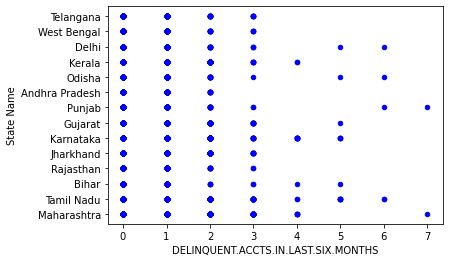

In [35]:
df.plot.scatter(x="DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS",y="State Name",color='b')
plt.show()

<AxesSubplot:xlabel='NO.OF_INQUIRIES', ylabel='Count'>

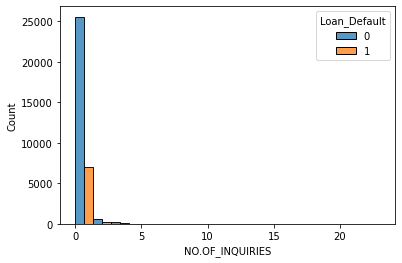

In [36]:
sns.histplot(x='NO.OF_INQUIRIES',hue='Loan_Default',data=df,multiple='dodge')

<AxesSubplot:xlabel='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', ylabel='count'>

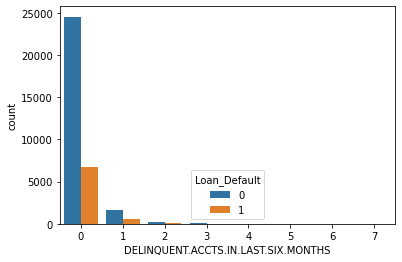

In [37]:
sns.countplot(x="DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS", hue="Loan_Default", data=df)

<AxesSubplot:xlabel='Region', ylabel='count'>

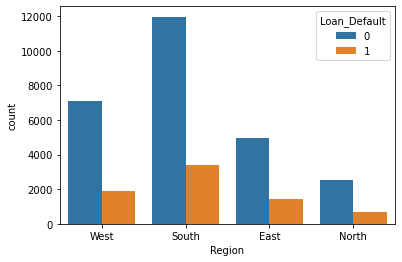

In [38]:
sns.countplot(x="Region", hue="Loan_Default", data=df)

In [39]:
# loans defaulted in last six months

df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0    31254
1     2148
2      360
3      100
4       19
5       14
6        5
7        2
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

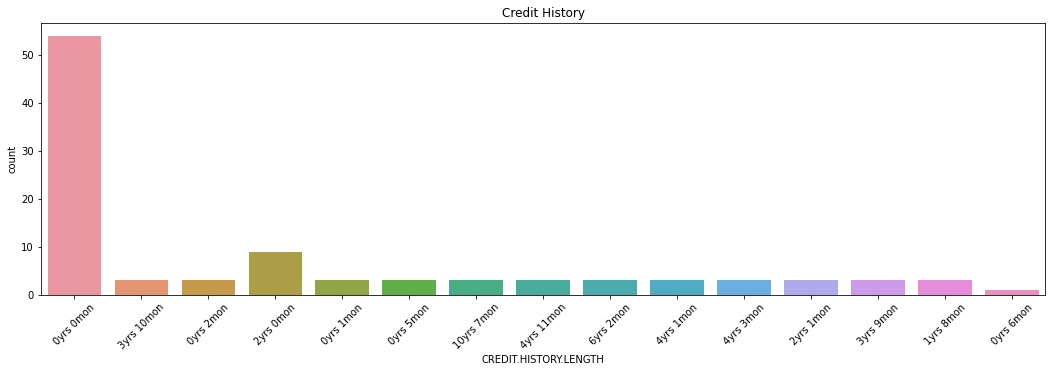

In [40]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(df['CREDIT.HISTORY.LENGTH'].head(100))
plt.title('Credit History')
plt.xticks(rotation = 45)
plt.show

Loan_Id  Disbursed_Amount  Asset_Cost  \
Loan_Id                              1.000000         -0.010443   -0.006060   
Disbursed_Amount                    -0.010443          1.000000    0.743790   
Asset_Cost                          -0.006060          0.743790    1.000000   
ltv                                 -0.006236          0.382782   -0.306615   
Branch_Id                            0.000451          0.026510    0.022288   
MobileNo_Avl_Flag                         NaN               NaN         NaN   
Aadhar_flag                          0.004081         -0.020633   -0.095394   
PAN_flag                            -0.002740          0.010374    0.039575   
VoterID_flag                        -0.002796          0.019912    0.090969   
Driving_flag                         0.002814         -0.002494    0.015646   
Passport_flag                       -0.006450         -0.001403   -0.007224   
PERFORM_CNS.SCORE                    0.010577          0.008429   -0.053998   
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  0.001240          0.016384   -0.003329   
NO.OF_INQUIRIES                     -0.005989          0.029753   -0.023332   
Loan_Default                        -0.007867          0.063384    0.003411   
Postal_Code_y                       -0.003031          0.006900    0.001536   
Self employed                        0.007667         -0.038269    0.037164   

                                          ltv  Branch_Id  MobileNo_Avl_Flag  \
Loan_Id                             -0.006236   0.000451                NaN   
Disbursed_Amount                     0.382782   0.026510                NaN   
Asset_Cost                          -0.306615   0.022288                NaN   
ltv                                  1.000000   0.015304                NaN   
Branch_Id                            0.015304   1.000000                NaN   
MobileNo_Avl_Flag                         NaN        NaN                NaN   
Aadhar_flag                          0.098749  -0.044395                NaN   
PAN_flag                            -0.028779   0.020123                NaN   
VoterID_flag                        -0.092375   0.029793                NaN   
Driving_flag                        -0.023206  -0.016579                NaN   
Passport_flag                        0.008698  -0.010003                NaN   
PERFORM_CNS.SCORE                    0.088182  -0.022520                NaN   
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  0.034832  -0.000832                NaN   
NO.OF_INQUIRIES                      0.085053  -0.001061                NaN   
Loan_Default                         0.093080   0.036352                NaN   
Postal_Code_y                        0.006074   0.000695                NaN   
Self employed                       -0.100826  -0.012531                NaN   

                                     Aadhar_flag  PAN_flag  VoterID_flag  \
Loan_Id                                 0.004081 -0.002740     -0.002796   
Disbursed_Amount                       -0.020633  0.010374      0.019912   
Asset_Cost                             -0.095394  0.039575      0.090969   
ltv                                     0.098749 -0.028779     -0.092375   
Branch_Id                              -0.044395  0.020123      0.029793   
MobileNo_Avl_Flag                            NaN       NaN           NaN   
Aadhar_flag                             1.000000 -0.174564     -0.864610   
PAN_flag                               -0.174564  1.000000      0.155086   
VoterID_flag                           -0.864610  0.155086      1.000000   
Driving_flag                           -0.285559  0.010103     -0.055289   
Passport_flag                          -0.079373  0.002517     -0.018100   
PERFORM_CNS.SCORE                       0.067861  0.025517     -0.073270   
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     0.023320  0.002212     -0.023317   
NO.OF_INQUIRIES                         0.026223  0.023764     -0.015486   
Loan_Default                           -0.047694  0.

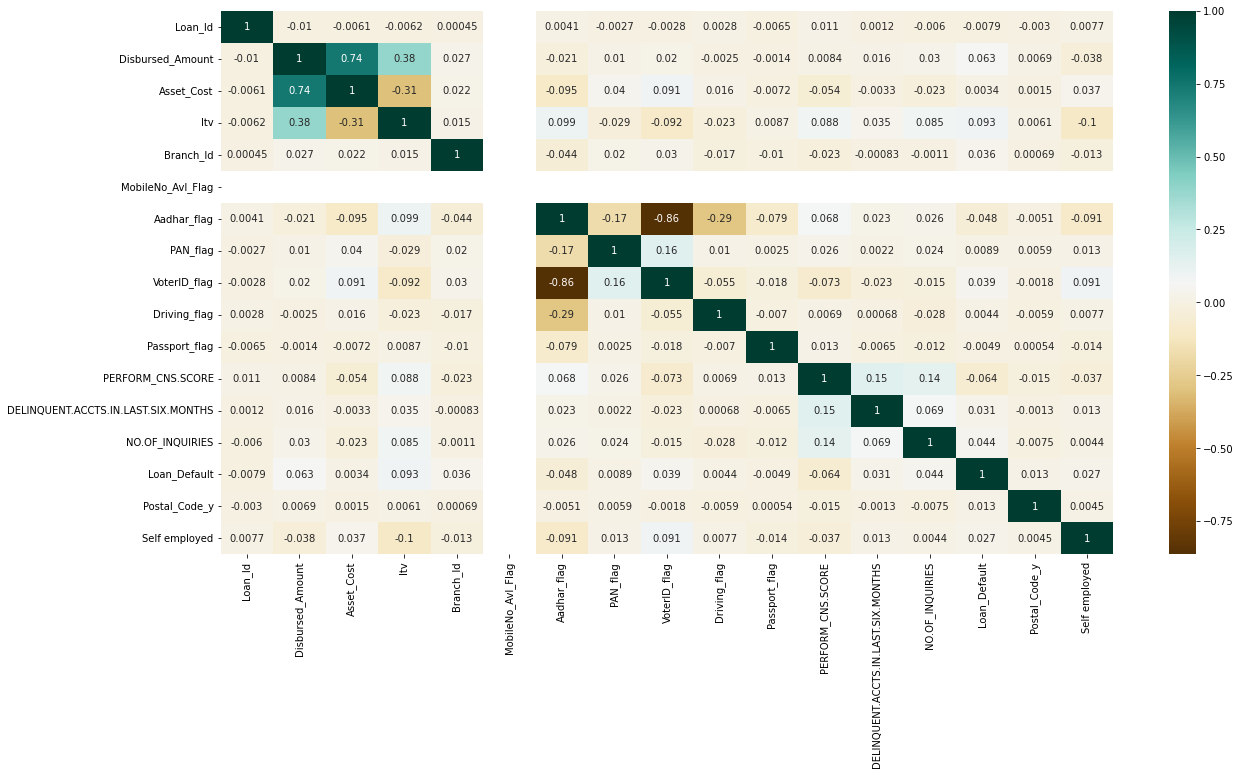

In [41]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Categorical Features Analysis

In [42]:
#Employment_Type
pd.crosstab(df['Employment_Type'],df['Loan_Default'])

Loan_Default         0     1
Employment_Type             
Salaried         11449  2936
Self employed    14167  4209
Unemployed         870   271

In [43]:
df1 = pd.crosstab(df['Employment_Type'],df['Loan_Default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [44]:
print('Percentage of salaried people who have defaulted:',
     np.round(df[(df['Employment_Type']=='Salaried') & (df['Loan_Default']==1)].shape[0]/(df[df['Employment_Type']=='Salaried'].shape[0])*100,3))
print('Percentage of self employed people who have defaulted:',
     np.round(df[(df['Employment_Type']=='Self employed') & (df['Loan_Default']==1)].shape[0]/(df[df['Employment_Type']=='Self employed'].shape[0])*100,3))

Percentage of salaried people who have defaulted: 20.41
Percentage of self employed people who have defaulted: 22.905


In [45]:
#MobileNo Avl Flag
pd.crosstab(df['MobileNo_Avl_Flag'],df['Loan_Default'])

Loan_Default           0     1
MobileNo_Avl_Flag             
1                  26486  7416

In [46]:
df1 = pd.crosstab(df['MobileNo_Avl_Flag'],df['Loan_Default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [47]:
print('Percentage of salaried people who have defaulted:',
     np.round(df[(df['MobileNo_Avl_Flag']==1) & (df['Loan_Default']==1)].shape[0]/(df[df['MobileNo_Avl_Flag']==1].shape[0])*100,3))
print('Percentage of self employed people who have defaulted:',
     np.round(df[(df['MobileNo_Avl_Flag']==0) & (df['Loan_Default']==1)].shape[0]/(df[df['MobileNo_Avl_Flag']==1].shape[0])*100,3))

Percentage of salaried people who have defaulted: 21.875
Percentage of self employed people who have defaulted: 0.0


In [48]:
#Aadhar
pd.crosstab(df['Aadhar_flag'],df['Loan_Default'])

Loan_Default      0     1
Aadhar_flag              
0              3782  1366
1             22704  6050

In [49]:
df2= pd.crosstab(df['Aadhar_flag'],df['Loan_Default'])
fig = px.bar(df2, barmode = 'group',width=600,height=400)
fig.show()

In [50]:
print('Percentage of people who have given their Aadhar details and defaulted:',
     np.round(df[(df['Aadhar_flag']==1) & (df['Loan_Default']==1)].shape[0]/(df[df['Aadhar_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their Aadhar details and defaulted:',
     np.round(df[(df['Aadhar_flag']==0) & (df['Loan_Default']==1)].shape[0]/(df[df['Aadhar_flag']==0].shape[0])*100,3))

Percentage of people who have given their Aadhar details and defaulted: 21.041
Percentage of people who have not given their Aadhar details and defaulted: 26.535


In [51]:
#PAN
pd.crosstab(df['PAN_flag'],df['Loan_Default'])

Loan_Default      0     1
PAN_flag                 
0             24598  6846
1              1888   570

In [52]:
df3 = pd.crosstab(df['PAN_flag'],df['Loan_Default'])
fig = px.bar(df3, barmode = 'group',width=600,height=400)
fig.show()

In [53]:
print('Percentage of people who have given their PAN details and defaulted:',
     np.round(df[(df['PAN_flag']==1) & (df['Loan_Default']==1)].shape[0]/(df[df['PAN_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their PAN details and defaulted:',
     np.round(df[(df['PAN_flag']==0) & (df['Loan_Default']==1)].shape[0]/(df[df['PAN_flag']==0].shape[0])*100,3))

Percentage of people who have given their PAN details and defaulted: 23.19
Percentage of people who have not given their PAN details and defaulted: 21.772


In [54]:
#Voter ID
pd.crosstab(df['VoterID_flag'],df['Loan_Default'])

Loan_Default      0     1
VoterID_flag             
0             23010  6200
1              3476  1216

In [55]:
df4= pd.crosstab(df['VoterID_flag'],df['Loan_Default'])
fig = px.bar(df4, barmode = 'group',width=600,height=400)
fig.show()

In [56]:
print('Percentage of people who have given their voter_id details and defaulted:',
     np.round(df[(df['VoterID_flag']==1) & (df['Loan_Default']==1)].shape[0]/(df[df['VoterID_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their voter_id details and defaulted:',
     np.round(df[(df['VoterID_flag']==0) & (df['Loan_Default']==1)].shape[0]/(df[df['VoterID_flag']==0].shape[0])*100,3))

Percentage of people who have given their voter_id details and defaulted: 25.916
Percentage of people who have not given their voter_id details and defaulted: 21.226


In [57]:
#Driving
pd.crosstab(df['Driving_flag'],df['Loan_Default'])

Loan_Default      0     1
Driving_flag             
0             25875  7233
1               611   183

In [58]:
df5= pd.crosstab(df['Driving_flag'],df['Loan_Default'])
fig = px.bar(df5, barmode = 'group',width=600,height=400)
fig.show()

In [59]:
print('Percentage of people who have given their DL details and defaulted:',
     np.round(df[(df['Driving_flag']==1) & (df['Loan_Default']==1)].shape[0]/(df[df['Driving_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their DL details and defaulted:',
     np.round(df[(df['Driving_flag']==0) & (df['Loan_Default']==1)].shape[0]/(df[df['Driving_flag']==0].shape[0])*100,3))

Percentage of people who have given their DL details and defaulted: 23.048
Percentage of people who have not given their DL details and defaulted: 21.847


In [60]:
#Passport
pd.crosstab(df['Passport_flag'],df['Loan_Default'])

Loan_Default       0     1
Passport_flag             
0              26429  7404
1                 57    12

In [61]:
df6= pd.crosstab(df['Passport_flag'],df['Loan_Default'])
fig = px.bar(df6, barmode = 'group',width=600,height=400)
fig.show()

In [62]:
print('Percentage of people who have given their Passport details and defaulted:',
     np.round(df[(df['Passport_flag']==1) & (df['Loan_Default']==1)].shape[0]/(df[df['Passport_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their Passport details and defaulted:',
     np.round(df[(df['Passport_flag']==0) & (df['Loan_Default']==1)].shape[0]/(df[df['Passport_flag']==0].shape[0])*100,3))

Percentage of people who have given their Passport details and defaulted: 17.391
Percentage of people who have not given their Passport details and defaulted: 21.884


## Statistical Hypothesis Techniques

Main focus of the Hypothesis Testing is to draw relations and infer. insights between loan default and different features in this dataset (df)

## Test of Normality
Normality:The population data sould follow normal ( by default alpha =5%)

H0: pop data = Normal

H1: pop data != normal

Note: if p value >=alpha --> pop data = Normal

<AxesSubplot:xlabel='ltv', ylabel='Density'>

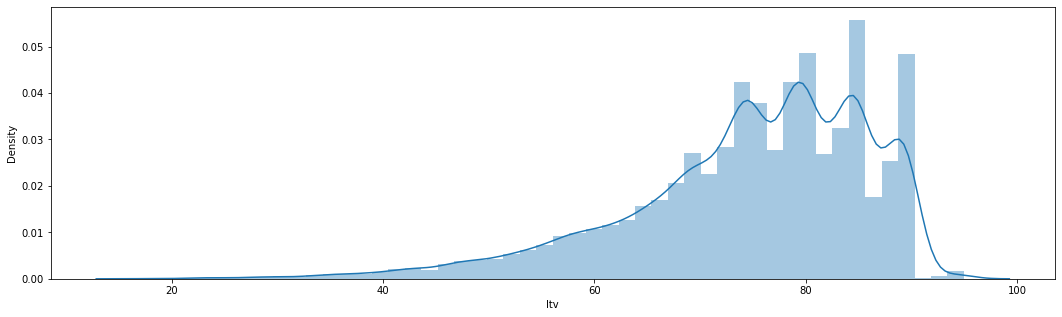

In [63]:
sns.distplot(df.ltv)

In [64]:
st.shapiro(df.ltv)

ShapiroResult(statistic=0.9293789863586426, pvalue=0.0)

Sicne p value < alpha (0.05) --> reject H0.

Hence we can conclude that pop data of LTV ratio does not folow normal distribution

So we can not do the parametric test. proceed for non parametric test

Test of Median

H0: pop LTV >=50

H1:pop LTV <50

In [65]:
pop_median=50
alpha = 0.05
diff_median = df.ltv-pop_median 
## Wilcoxon  test 
st.wilcoxon(diff_median, alternative='less')

WilcoxonResult(statistic=570401111.5, pvalue=1.0)

WilcoxonResult(statistic=570401111.5, pvalue=1.0)

sicne p value( close to 0) is greater than alpha( 5%) --> Accept H0

Inference: We can conclude that the pop median of Loan to value (LTV) is >50.

## 2 Independent Samples test
Prob: Test whether the ltv value is same for Employment_Type?

<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

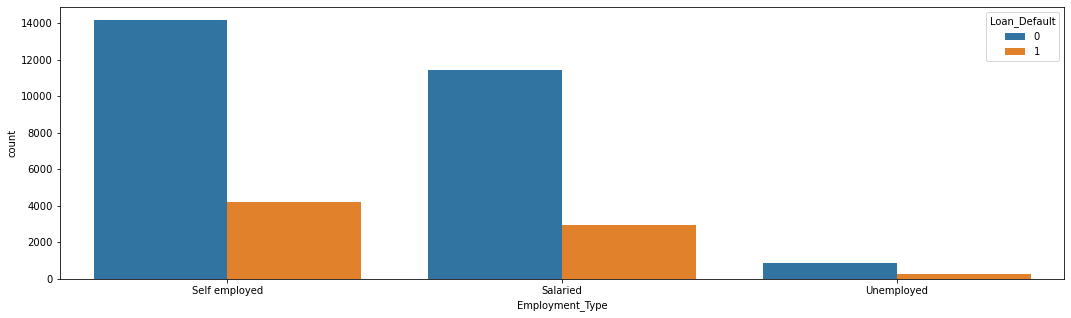

In [66]:
sns.countplot(x="Employment_Type", hue="Loan_Default", data=df)

## Test of Proportion

In [67]:
df.Loan_Default.value_counts()

0    26486
1     7416
Name: Loan_Default, dtype: int64

<AxesSubplot:xlabel='Loan_Default', ylabel='count'>

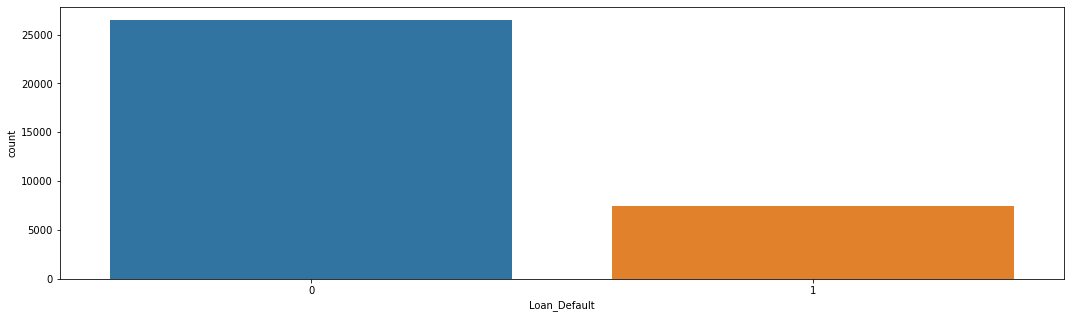

In [68]:
sns.countplot(df.Loan_Default)

H0: P=0.3 : The Default Loan propotion rate is 30%

H1: P!=0.3 : The Default Loan rate is not 30%

In [69]:
alpha=0.05
P=0.3
x=2347.6
n=32761
p=x/n
q=1-p
se= np.sqrt(p*q/n)
z_st = (p-P)/se
z_crit= st.norm.isf(alpha/2)
print(z_st, z_crit)

-160.24197019005072 1.9599639845400545


In [70]:
print(" pvalue is", st.norm.cdf(z_st)*2)

 pvalue is 0.0


In [71]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(x,n,P)

(-160.24197019005072, 0.0)

Since p value < alpha(0.05)--> Reject H0. The loan default rate is not 30 %.

## Two samples Test of Proportion
Test whether the loan proportion is different for different Employment type?

H0: P_Salaried= P_Self Employed; P_salaried-P_self emplyed=0 : There is no difference in loan proportion

H1: P_Salaried != P_Self Employed ; P_salaried-P_self Employed!=0 : There is difference in loan proportion

In [72]:
pd.crosstab(df.Employment_Type,df.Loan_Default)

Loan_Default         0     1
Employment_Type             
Salaried         11449  2936
Self employed    14167  4209
Unemployed         870   271

<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

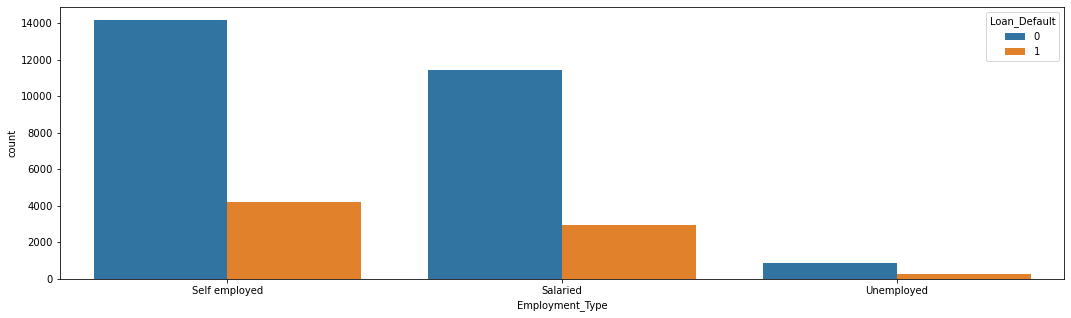

In [73]:
sns.countplot(x="Employment_Type", hue="Loan_Default", data=df)

In [74]:
df["Employment_Type"].describe()

count             33902
unique                3
top       Self employed
freq              18376
Name: Employment_Type, dtype: object

In [75]:
alpha=0.05
P_diff=0
xm= 11449
nm =18376
pm=xm/nm
xf=14167
nf=14385
pf=xf/nf
n=32761
p=(xm+xf)/(nm+nf)
q=1-p
se= np.sqrt(p*q*((1/nm)+(1/nf)))
z_st = ((pm-pf)-(P_diff))/se
z_crit= st.norm.isf(alpha/2)
print(z_st, z_crit)

-78.70024272701211 1.9599639845400545


In [76]:
print("p value is ", st.norm.sf(z_st)*2)

p value is  2.0


In [77]:
proportions_ztest([xm,xf],[nm,nf])

(-78.70024272701211, 0.0)

Since p value (0.0) < alpha(0.05) --> reject H0

We can conclude that there is difference in Loan Default proportion of Salaried and Self Employed

## Chi Square test
Is there any assoication b/w Loan Default and Region?

Ho:There in no assoication or independency b/w Loan Default and Region

H1:There is an association or dependency b/w Loan Default and Region

In [78]:
table= pd.crosstab(df.Loan_Default,df.Region)
table

Region        East  North  South  West
Loan_Default                          
0             4931   2511  11971  7073
1             1437    676   3388  1915

<AxesSubplot:xlabel='Region', ylabel='count'>

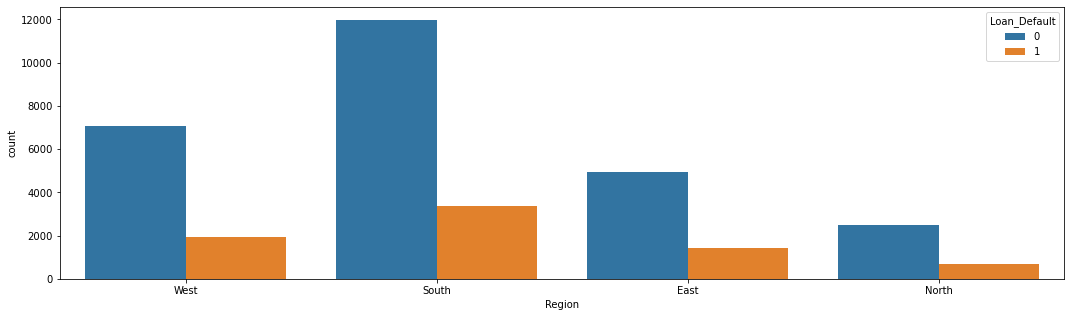

In [79]:
sns.countplot(x="Region", hue="Loan_Default", data=df)

In [80]:
st.chi2_contingency(table)

(4.605765007227732,
 0.20304808764047969,
 3,
 array([[ 4975.01173972,  2489.84962539, 11999.24706507,  7021.89156982],
        [ 1392.98826028,   697.15037461,  3359.75293493,  1966.10843018]]))

In [81]:
## p value
st.chi2.sf(3.647580215555611,3)

0.30211981048019254

In [82]:
## Chi square critcal
st.chi2.isf(alpha,1)

3.8414588206941285

Chisquare Value Analysis:

chisquare_stat>chi square_critical ---> reject H0

PVA:

p-value <alpha(0.05)-->Reject H0

hence we can conclude that there is an association b/w Loan Default and region in this given dataset

In [83]:
df.drop(['PAN_flag','Driving_flag','Passport_flag','Employment_Type','City_Code',
       'Date_of_Birth', 'DisbursalDate', 'CREDIT.HISTORY.LENGTH', 'Region_ID', 'State_Code_y',
       'City_Name_x', 'Postal_Code_y', 'Region', 'State Name'],axis=1,inplace=True)

In [84]:
df.columns

Index(['Loan_Id', 'Disbursed_Amount', 'Asset_Cost', 'ltv', 'Branch_Id',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'Loan_Default', 'Self employed'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33902 entries, 0 to 33901
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Id                              33902 non-null  int64  
 1   Disbursed_Amount                     33902 non-null  int64  
 2   Asset_Cost                           33902 non-null  int64  
 3   ltv                                  33902 non-null  float64
 4   Branch_Id                            33902 non-null  int64  
 5   MobileNo_Avl_Flag                    33902 non-null  int64  
 6   Aadhar_flag                          33902 non-null  int64  
 7   VoterID_flag                         33902 non-null  int64  
 8   PERFORM_CNS.SCORE                    33902 non-null  int64  
 9   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  33902 non-null  int64  
 10  NO.OF_INQUIRIES                      33902 non-null  int64  
 11  Loan_Default                

# Machine Learning Model Building

# Logistic Regression

In [86]:
x= df.drop('Loan_Default', axis=1)
y= df.Loan_Default

In [87]:
x = pd.get_dummies(x,drop_first=True)

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()
for col in x.columns:
    x[col] = sc.fit_transform(x[col].values.reshape(-1,1))

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

In [92]:
print(f'xtrain shape:{x_train.shape}')
print(f'ytrain shape:{y_train.shape}')
print(f'xtest shape:{x_test.shape}')
print(f'ytest shape:{y_test.shape}')

xtrain shape:(27121, 12)
ytrain shape:(27121,)
xtest shape:(6781, 12)
ytest shape:(6781,)


In [93]:
log_model= LogisticRegression()


In [94]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [95]:
prob_pred_y = log_model.predict_proba(x_test)
prob_pred_y

array([[0.88799453, 0.11200547],
       [0.81002671, 0.18997329],
       [0.78446481, 0.21553519],
       ...,
       [0.84474411, 0.15525589],
       [0.60501115, 0.39498885],
       [0.80879084, 0.19120916]])

In [96]:
pred_y = log_model.predict(x_test)
pred_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
accuracy_score(y_test,pred_y)

0.7787936882465712

In [98]:
f1_score(y_test,pred_y)

0.005305039787798409

In [99]:
precision_score(y_test,pred_y)

0.36363636363636365

In [100]:
recall_score(y_test,pred_y)

0.0026720106880427524

In [101]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5284
           1       0.36      0.00      0.01      1497

    accuracy                           0.78      6781
   macro avg       0.57      0.50      0.44      6781
weighted avg       0.69      0.78      0.68      6781



In [102]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred_y)

0.5006736283568904

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_y)

array([[5277,    7],
       [1493,    4]], dtype=int64)

In [104]:
cohen_kappa_score(y_test, pred_y)

0.002091081030223818

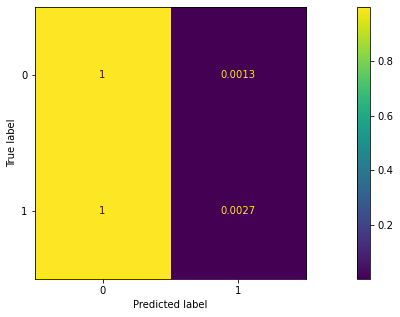

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, x_test, y_test, normalize='true')

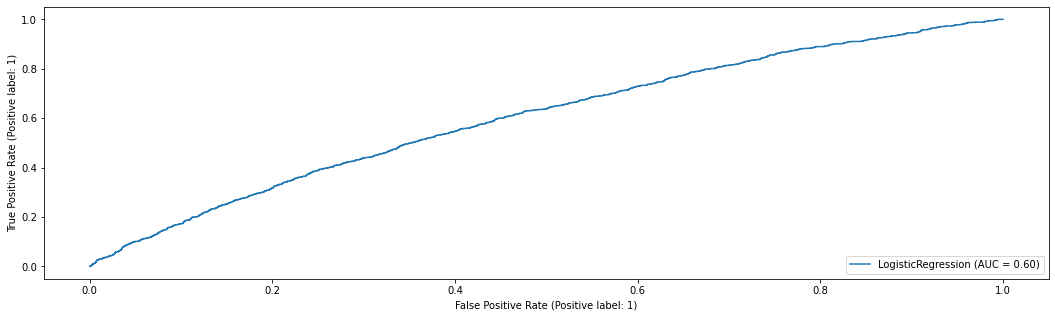

In [106]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model, x_test, y_test)

In [107]:
log_model.coef_

array([[-0.01260658, -0.14055189,  0.20372014,  0.39771263,  0.08238115,
         0.        , -0.13505059, -0.02421018, -0.19598684,  0.08100523,
         0.10856729,  0.08812856]])

## Linear Regression

In [108]:
y = df['Loan_Default']
X = df.drop('Loan_Default',axis=1)

In [109]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=120)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [111]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_train_prob = lr.predict_proba(X_train)
y_test_prob = lr.predict_proba(X_test)
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.60498187532925
The test AUC score is: 0.6074952418431273


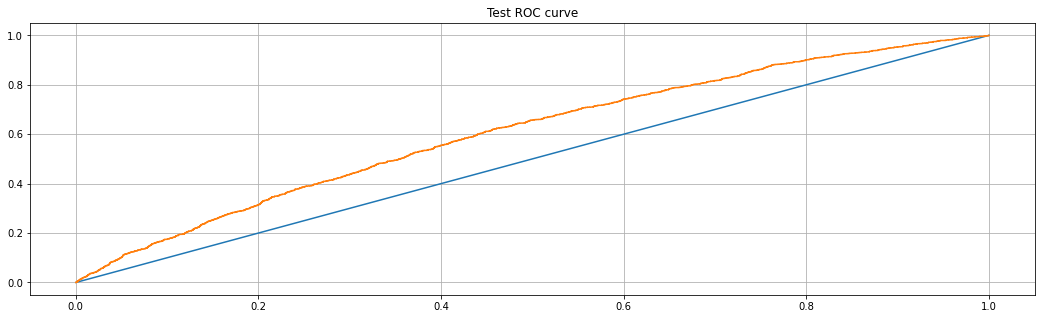

In [112]:
import sklearn
from sklearn import metrics
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [113]:
confusion_matrix(y_test,y_test_pred)

array([[7937,   15],
       [2208,   11]], dtype=int64)

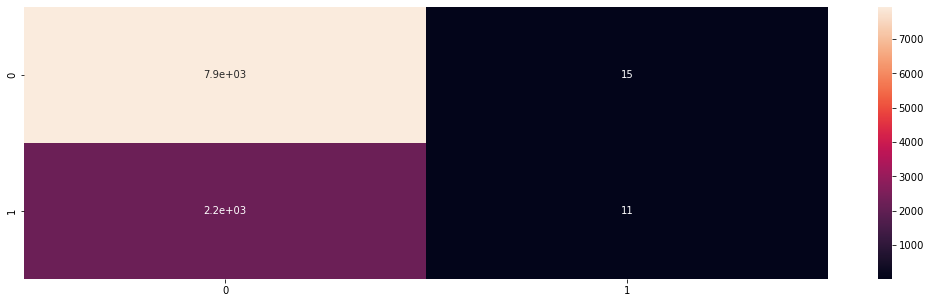

In [114]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [115]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7952
           1       0.42      0.00      0.01      2219

    accuracy                           0.78     10171
   macro avg       0.60      0.50      0.44     10171
weighted avg       0.70      0.78      0.69     10171



In [116]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lr, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=42,
                                                         solver='liblinear'),
                       cv=3, method='isotonic')

In [117]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
sklearn.metrics.log_loss(y_test,isotonic_predict_prob_test)

0.5190432301491877

In [118]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)
X_train_sm.shape, y_train_sm.shape

((37068, 12), (37068,))

## Random Forest Classifier

### Modelling without SMOTE

In [119]:
rsearch1_best_params = {'max_depth': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 11,
 'n_estimators': 374}

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(**rsearch1_best_params, random_state=300)
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=11,
                       n_estimators=374, random_state=300)

In [121]:
y_train_pred = rfc1.predict(X_train)
y_test_pred = rfc1.predict(X_test)
y_train_prob = rfc1.predict_proba(X_train)
y_test_prob = rfc1.predict_proba(X_test)


In [122]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.8978686913757032
The test AUC score is: 0.749044061575401


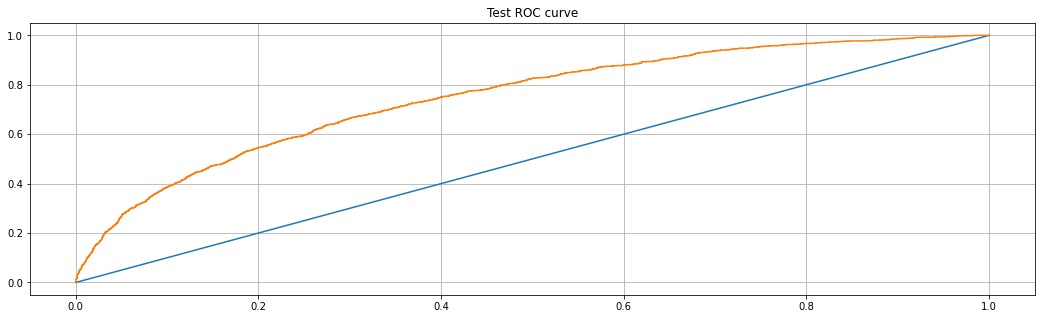

In [123]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [124]:
confusion_matrix(y_test,y_test_pred)

array([[7946,    6],
       [2187,   32]], dtype=int64)

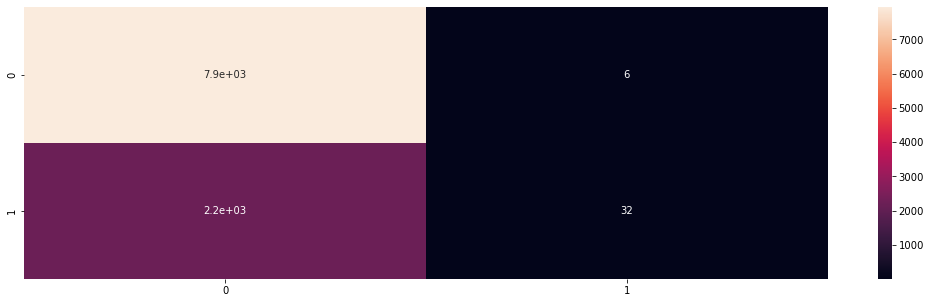

In [125]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [126]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7952
           1       0.84      0.01      0.03      2219

    accuracy                           0.78     10171
   macro avg       0.81      0.51      0.45     10171
weighted avg       0.80      0.78      0.69     10171



In [127]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(rfc1, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=13,
                                                             min_samples_leaf=10,
                                                             min_samples_split=11,
                                                             n_estimators=374,
                                                             random_state=300),
                       cv=3, method='isotonic')

In [128]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
sklearn.metrics.log_loss(y_test,isotonic_predict_prob_test)

0.4636111929532047

## Modelling with SMOTE

In [129]:
rsearch_best_params = {'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 317}
rfc = RandomForestClassifier(**rsearch_best_params, random_state=300)
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=317, random_state=300)

In [130]:
y_train_pred = rfc.predict(X_train_sm)
y_test_pred = rfc.predict(X_test)
y_train_prob = rfc.predict_proba(X_train_sm)
y_test_prob = rfc.predict_proba(X_test)

In [131]:
print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.9849373389045851
The test AUC score is: 0.8159144139283652


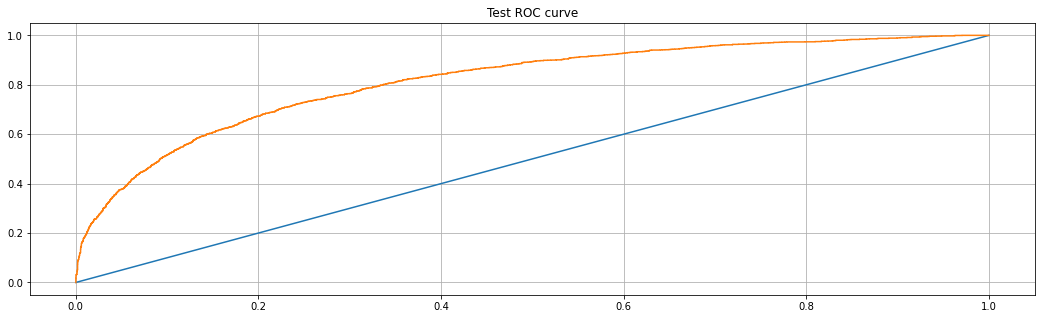

In [132]:
fpr, tpr, thresholds =sklearn.metrics.roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [133]:
confusion_matrix(y_test,y_test_pred)

array([[6380, 1572],
       [ 728, 1491]], dtype=int64)

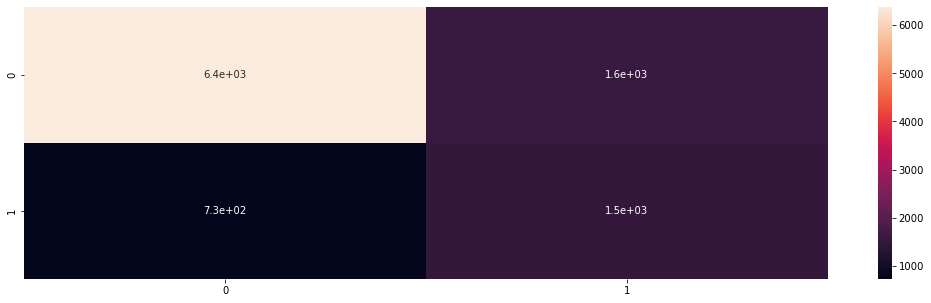

In [134]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [135]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      7952
           1       0.49      0.67      0.56      2219

    accuracy                           0.77     10171
   macro avg       0.69      0.74      0.71     10171
weighted avg       0.81      0.77      0.79     10171



In [136]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(rfc, cv=3, method='isotonic')
model_isotonic.fit(X_train_sm,y_train_sm)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=17,
                                                             min_samples_leaf=2,
                                                             min_samples_split=4,
                                                             n_estimators=317,
                                                             random_state=300),
                       cv=3, method='isotonic')

In [137]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
sklearn.metrics.log_loss(y_test,isotonic_predict_prob_test)

0.4663005744023142

## Inference

The problem statement asks us to calculate the likelihood of a loanee/borrower defaulting on a loan. As a result, in addition to predicting whether a person is a defaultee or not, we must also predict the likelihood that a person will default on the loan.

As a result, we used AUC-score, F1-score of 1's, and Binary Log Loss as performance metrics to assess model performance.



All models give significantly lower F1-scores when SMOTE is not used (1s). This problem has been resolved  by the use of SMOTE (Though the f1-scores can be controlled by selecting the appropriate threshold from the ROC curve).

Looking at the performance metrics of various models in the table above, we can see that Logistic Regression with SMOTE performs extremely well when compared to other models. It produces good AUC scores (without overfitting) and the best F1-Score (1). When compared to other models, the Binary log loss is slightly higher.

Random Forest Classifier with SMOTE is the next best model. AUC scores show that it is overfitting when compared to Logistic Regression. It does, however, have a good F1-score(1), which is slightly lower than Logistic Regression. When compared to Logistic Regression, it has a better(lower) binary log loss.
